<a href="https://colab.research.google.com/github/eugeqq/Protocolos/blob/main/MyS_C8A_Modelos_Economicos__R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo - Modelos Económicos aplicados a una Fábrica de Sensores IoT

Imaginemos que somos el equipo de análisis económico y productivo de una empresa llamada SmartSense S.A., dedicada a la fabricación de sensores IoT (Internet of Things) para el sector industrial y de domótica.

La empresa está experimentando un fuerte crecimiento y necesita entender cómo se comportan sus costos y su productividad, con el fin de optimizar sus decisiones de inversión y producción.

La dirección de la compañía solicita un informe técnico que permita responder a tres preguntas clave:
1. Cuál es el nivel de producción óptimo que minimiza el costo unitario?
2. Cómo se relaciona la producción total (Q) con los factores productivos (capital K y trabajo L)?
3. Qué tipo de rendimientos a escala tiene la empresa actualmente?
4. Cómo se pueden ajustar modelos no lineales para representar relaciones económicas del proceso productivo?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import root_scalar, curve_fit
import math

🔹 PUNTO 1: Nivel de producción óptimo
Q* (producción óptima) = 223.61 unidades
CT(Q*) = 28944.27 USD
CP(Q*) = 129.44 USD por unidad


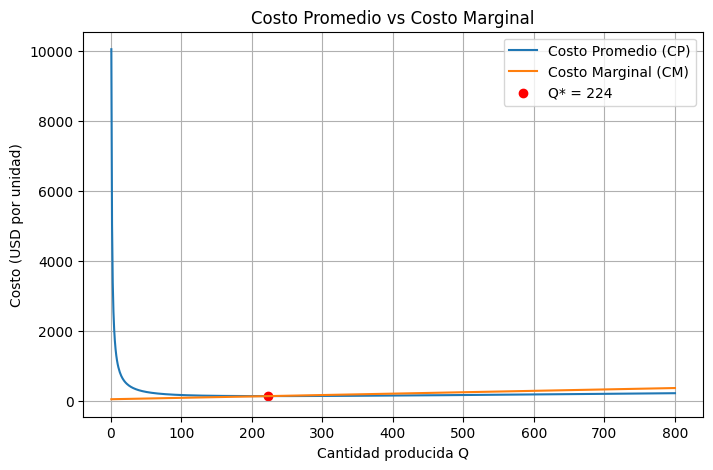

In [ ]:
# -----------------------------------------------------
# 1️⃣ PUNTO 1: Nivel de producción óptimo (costo unitario mínimo)
# -----------------------------------------------------

# Función de costos totales
def CT(Q):
    return 10000 + 40*Q + 0.2*(Q**2)

def CM(Q):
    return 40 + 0.4*Q  # derivada de CT

def CP(Q):
    return CT(Q)/Q

# Buscamos el punto donde CP = CM -> Mínimo del costo promedio
f = lambda q: CM(q) - CP(q)
sol = root_scalar(f, bracket=[1, 1000], method='bisect')
Q_star = sol.root

print("🔹 PUNTO 1: Nivel de producción óptimo")
print(f"Q* (producción óptima) = {Q_star:.2f} unidades")
print(f"CT(Q*) = {CT(Q_star):.2f} USD")
print(f"CP(Q*) = {CP(Q_star):.2f} USD por unidad")

# Graficamos
Q = np.linspace(1, 800, 800)
plt.figure(figsize=(8,5))
plt.plot(Q, CP(Q), label="Costo Promedio (CP)")
plt.plot(Q, CM(Q), label="Costo Marginal (CM)")
plt.scatter(Q_star, CP(Q_star), color="red", label=f"Q* = {Q_star:.0f}")
plt.xlabel("Cantidad producida Q")
plt.ylabel("Costo (USD por unidad)")
plt.title("Costo Promedio vs Costo Marginal")
plt.legend()
plt.grid(True)
plt.show()


🔹 PUNTO 2: Estimación modelo Cobb–Douglas
A estimado = 2.3212
alpha (K) = 0.4188
beta (L) = 0.5988
alpha + beta = 1.0176
→ Rendimientos a escala: constantes


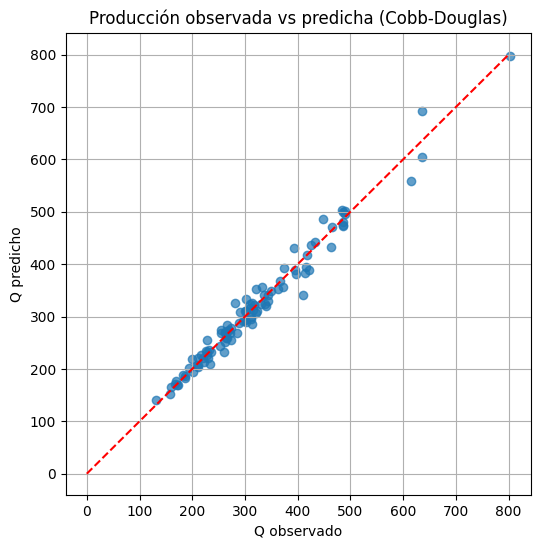

In [ ]:
# -----------------------------------------------------
# 2️⃣ PUNTO 2: Relación entre producción Q, capital K y trabajo L
# -----------------------------------------------------

# Generamos datos simulados de capital y trabajo
np.random.seed(42)
n = 100
K = np.random.lognormal(mean=4.5, sigma=0.6, size=n)
L = np.random.lognormal(mean=5.0, sigma=0.5, size=n)

# Parámetros reales (para simular)
A_real, alpha_real, beta_real = 2.5, 0.4, 0.6
noise = np.random.lognormal(mean=0, sigma=0.05, size=n)
Q = A_real * (K**alpha_real) * (L**beta_real) * noise

# Ajuste del modelo Cobb-Douglas
lnK = np.log(K).reshape(-1,1)
lnL = np.log(L).reshape(-1,1)
lnQ = np.log(Q).reshape(-1,1)
X = np.concatenate([lnK, lnL], axis=1)
model = LinearRegression()
model.fit(X, lnQ)

lnA_hat = model.intercept_[0]
alpha_hat, beta_hat = model.coef_[0]
A_hat = math.exp(lnA_hat)

print("\n🔹 PUNTO 2: Estimación modelo Cobb–Douglas")
print(f"A estimado = {A_hat:.4f}")
print(f"alpha (K) = {alpha_hat:.4f}")
print(f"beta (L) = {beta_hat:.4f}")
print(f"alpha + beta = {alpha_hat + beta_hat:.4f}")

if abs(alpha_hat + beta_hat - 1) < 0.05:
    print("→ Rendimientos a escala: constantes")
elif alpha_hat + beta_hat > 1:
    print("→ Rendimientos a escala: crecientes")
else:
    print("→ Rendimientos a escala: decrecientes")

# Predicciones
Q_pred = np.exp(model.predict(X))

# Gráfico Observado vs Predicho
plt.figure(figsize=(6,6))
plt.scatter(Q, Q_pred, alpha=0.7)
maxv = max(Q.max(), Q_pred.max())
plt.plot([0, maxv], [0, maxv], 'r--')
plt.title("Producción observada vs predicha (Cobb-Douglas)")
plt.xlabel("Q observado")
plt.ylabel("Q predicho")
plt.grid(True)
plt.show()


🔹 PUNTO 3: Ajuste de modelo no lineal (Y = A e^{Bx})
A estimado = 3.2061 (real 3.0)
B estimado = 0.4898 (real 0.5)


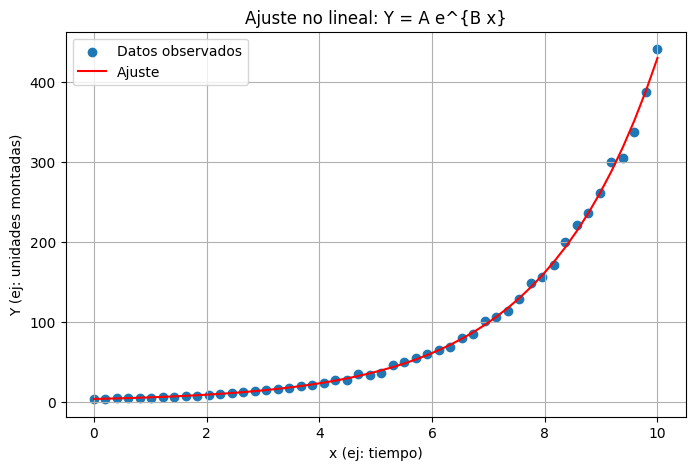

In [ ]:
# -----------------------------------------------------
# 3️⃣ PUNTO 3: Ajuste de modelo no lineal (Y = A * e^(B*x))
# -----------------------------------------------------

# Datos simulados (ej: tiempo de montaje vs cantidad de unidades)
x_data = np.linspace(0, 10, 50)
A_true, B_true = 3.0, 0.5
y_data = A_true * np.exp(B_true * x_data) * np.random.normal(1.0, 0.05, size=x_data.shape)

# Definimos modelo y ajustamos
def expo(x, A, B):
    return A * np.exp(B * x)

popt, pcov = curve_fit(expo, x_data, y_data, p0=[2.0, 0.4])
A_est, B_est = popt

print("\n🔹 PUNTO 3: Ajuste de modelo no lineal (Y = A e^{Bx})")
print(f"A estimado = {A_est:.4f} (real {A_true})")
print(f"B estimado = {B_est:.4f} (real {B_true})")

# Graficamos ajuste
plt.figure(figsize=(8,5))
plt.scatter(x_data, y_data, label="Datos observados")
plt.plot(x_data, expo(x_data, *popt), color='red', label="Ajuste")
plt.xlabel("x (ej: tiempo)")
plt.ylabel("Y (ej: unidades montadas)")
plt.title("Ajuste no lineal: Y = A e^{B x}")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# -----------------------------------------------------
# 4️⃣ PUNTO 4: Rendimientos a escala y análisis interpretativo
# -----------------------------------------------------

alpha_beta_sum = alpha_hat + beta_hat
print("\n🔹 PUNTO 4: Interpretación de rendimientos a escala")
print(f"Suma de parámetros α + β = {alpha_beta_sum:.4f}")

if alpha_beta_sum > 1:
    print("→ La empresa presenta rendimientos a escala crecientes.")
elif alpha_beta_sum < 1:
    print("→ La empresa presenta rendimientos a escala decrecientes.")
else:
    print("→ La empresa opera con rendimientos constantes a escala.")

# Simulamos el efecto de aumentar K y L un 10%
Q_original = A_hat * (K**alpha_hat) * (L**beta_hat)
Q_K_up = A_hat * ((K*1.1)**alpha_hat) * (L**beta_hat)
Q_KL_up = A_hat * ((K*1.1)**alpha_hat) * ((L*1.1)**beta_hat)

print("\nSimulación de aumentos en los factores productivos:")
print(f"Producción media original: {np.mean(Q_original):.2f}")
print(f"Producción media si K +10%: {np.mean(Q_K_up):.2f}")
print(f"Producción media si K y L +10%: {np.mean(Q_KL_up):.2f}")
print(f"Aumento porcentual total: {(np.mean(Q_KL_up)/np.mean(Q_original) - 1)*100:.2f}%")


🔹 PUNTO 4: Interpretación de rendimientos a escala
Suma de parámetros α + β = 1.0176
→ La empresa presenta rendimientos a escala crecientes.

Simulación de aumentos en los factores productivos:
Producción media original: 317.42
Producción media si K +10%: 330.34
Producción media si K y L +10%: 349.74
Aumento porcentual total: 10.18%


# Consigna: Modelos Económicos aplicados a una Fábrica de Alimentos Balanceados

La empresa NutriFeed S.A. se dedica a la producción de alimentos balanceados para animales (ganado bovino, porcino y avícola).
Durante los últimos meses, la compañía ha notado variaciones importantes en sus costos y niveles de productividad, por lo que el área de análisis económico fue convocada para entender cómo se comporta el proceso productivo y qué decisiones pueden optimizar los resultados.

Los gerentes quieren identificar el punto de producción más eficiente y evaluar la relación entre los factores productivos (capital y trabajo) y la producción total.

## Consigna 1: Análisis de costos

Suponiendo una función de costos totales:
$CT(Q)=15000+30Q+0.15Q^2$

Caluclar:
1. El costo promedio (CP) y el costo marginal (CM)
2. El nivel de producción $Q^*$ conde CP=CM (mínimo costo unitario)
3. El valor de $CT(Q^*)$ y $CP(Q^*)$

Graficar CT(Q), CP(Q) y CM(Q), e interpretar qué representa el punto de intersección.

## Consigna 2: Modelo de producción Cobb-Douglas

- Generar datos simulados de capital (K) y trabajo (L) para 100 observaciones
- Defina parámetros reales $A=5$, $α=0.3$, $β=0.7$ y agregue ruido multiplicativo
- Ajustar el modelo Cobb-Douglas por log-linealización:
$ln Q = ln A + α ln K + β ln L + ϵ$
- Estimar los parámetros A, $α$, $β$ e interpretar:
  - Qué factor (K o L) impacta más sobre la producción
  - Si la empresa presenta rendimientos crecientes, constantes o decrecientes

## Consigna 3: Ajuste no lineal (relación tiempo-producción)

- Simular una relación exponencial entre cantidad producida (x) y tiempo promedio de mezcla (y): $y=Ae^{Bx}$
con A=10, B=0,05 y algo de ruido aleatorio
- Ajustar el modelo lineal usando curve_fit y graficar:
  - Los datos observados
  - La curva ajustada
- Comparar los parámetros estimados con los reales e interpretar su significado económico